#Parte 1: Programação em Python

##1.2. Análise Exploratória de Dados de Vendas

○    Com o mesmo dataset simulado da tarefa anterior, crie visualizações/gráficos e com eles:

■    Crie um gráfico de linha mostrando a tendência de vendas ao longo do tempo, analisando os dados mensalmente.

■    Identifique e descreva pelo menos dois padrões ou insights interessantes que você observou nos dados.

○    Salve seu código e nomeie adequadamente.

Saving data_clean.csv to data_clean (4).csv


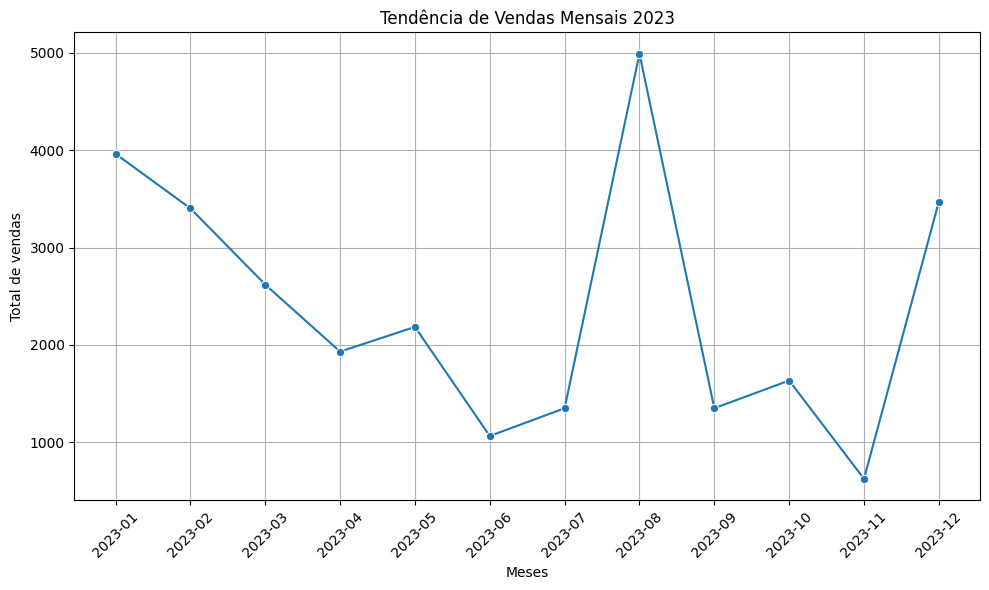

Insight 1: O mês com o maior total de vendas foi: 2023-08 com R$4993.85
Insight 2: O mês com o menor total de vendas foi: 2023-11 com R$623.74


In [ ]:
import pandas as pd #para manipular os dados
import numpy as np #para usar funções
import matplotlib.pyplot as plt #para criação de gráficos
import seaborn as sns #para criação de gráficos mais bonitos
from google.colab import files #para importar o arquivo que está na máquina

uploaded = files.upload()

df = pd.read_csv('data_clean.csv') #lendo o arquivo

df['Data'] = pd.to_datetime(df['Data']) #convertendo para datetime

df['Total_Vendas'] = df['Quantidade'] * df['Preço'] #calculando total de vendas

df['Ano_Mes'] = df['Data'].dt.to_period('M') #criando a coluna 'Ano_Mes' para agrupar por mês
vendas_mensais = df.groupby('Ano_Mes')['Total_Vendas'].sum().reset_index() #somando as vendas totais

#gráfico de linha - tendência de vendas mensais

plt.figure(figsize=(10,6)) #tamanho do gráfico
sns.lineplot(x=vendas_mensais['Ano_Mes'].astype(str), y=vendas_mensais['Total_Vendas'], marker='o') #gráfico de linha
plt.title('Tendência de Vendas Mensais 2023') #título do gráfico
plt.xlabel('Meses') #eixo x
plt.ylabel('Total de vendas') #eixo y
plt.xticks(rotation=45) #girando eixo
plt.grid(True) #adicionando grade
plt.tight_layout() #ajustando layout
plt.show() #exibindo o gráfico


# Encontrando o mês com o maior total de vendas
mes_max_vendas = vendas_mensais.loc[vendas_mensais['Total_Vendas'].idxmax()]

# Encontrando o mês com o menor total de vendas
mes_min_vendas = vendas_mensais.loc[vendas_mensais['Total_Vendas'].idxmin()]

# Exibindo os insights dos meses com maior e menor vendas
print(f"Insight 1: O mês com o maior total de vendas foi: {mes_max_vendas['Ano_Mes']} com R${mes_max_vendas['Total_Vendas']:.2f}")
print(f"Insight 2: O mês com o menor total de vendas foi: {mes_min_vendas['Ano_Mes']} com R${mes_min_vendas['Total_Vendas']:.2f}")


'''
1. O mês com o maior total de vendas foi: 2023-08 com R$4993.85

2. O mês com o menor total de vendas foi: 2023-11 com R$623.74

* Poderiamos repetir as estratégias de agosto, e ver se teriamos bons resultados também.
* Verificar o que aconteceu em novembro, para ser mais baixo, talvez aumentar a presença no online para compensar a loja.
* Oferecer promoções nos meses de baixa.
* Verificar parcerias e analisar a concorrência, poderiam ser pontos a explorar.




'''